In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon, t, probplot
import scipy.stats as st
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from pandas.plotting import lag_plot

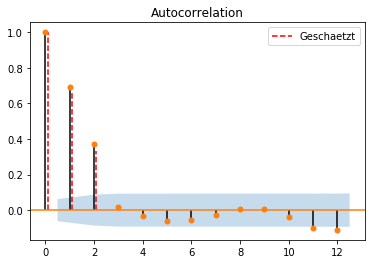

In [7]:
w = DataFrame(np.random.normal(size=1000))
MA = DataFrame(w.rolling(window=3).mean()).dropna()
plot_acf(MA, lags=12, c="C1")
plt.vlines(x=2.1, ymin=0, ymax=1/3, color="red", linestyle='--', label="Geschaetzt")
plt.vlines(x=1.1, ymin=0, ymax=2/3, color="red", linestyle='--')
plt.vlines(x=0.1, ymin=0, ymax=1, color="red", linestyle='--')
plt.legend()


In [8]:
df = pd.read_table("wave.dat")

In [9]:
df.head()

,waveht
0,367
1,407
2,-255
3,-515
4,-500


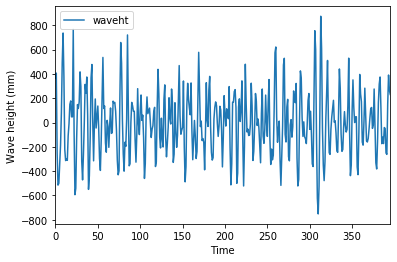

In [10]:
df.plot()
plt.xlabel("Time")
plt.ylabel("Wave height (mm)")
plt.show()

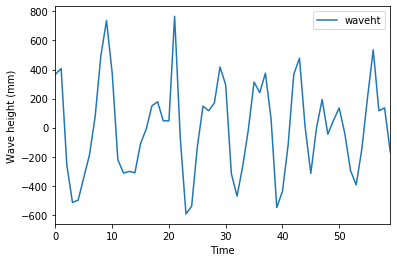

In [11]:
df.loc[0:59,:].plot()
plt.xlabel("Time")
plt.ylabel("Wave height (mm)")
plt.show()

In [14]:
from statsmodels.tsa.stattools import acf, plot_acf
acf(df["waveht"])[1]

0.47025639618837917

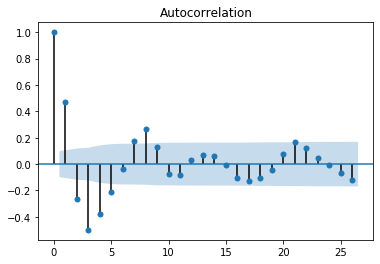

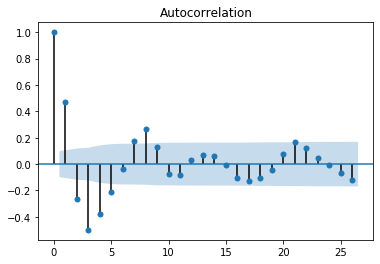

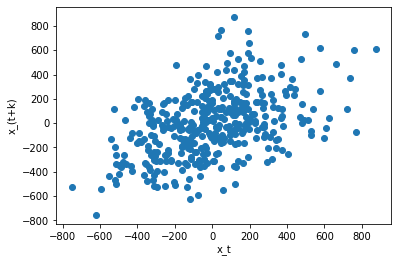

In [22]:
lag_plot(df,1)
plt.xlabel("x_t")
plt.ylabel("x_(t+k)")
plt.show()

In [23]:
acf(df["waveht"])[[2,3,5,10]]

C:\Users\flori\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([-0.26291153, -0.49891702, -0.21499293, -0.07431329])

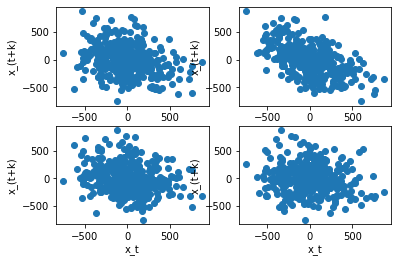

In [25]:
plt.subplot(221)
lag_plot(df,2)
plt.xlabel("x_t")
plt.ylabel("x_(t+k)")
plt.subplot(222)
lag_plot(df,3)
plt.xlabel("x_t")
plt.ylabel("x_(t+k)")
plt.subplot(223)
lag_plot(df,5)
plt.xlabel("x_t")
plt.ylabel("x_(t+k)")
plt.subplot(224)
lag_plot(df,10)
plt.xlabel("x_t")
plt.ylabel("x_(t+k)")
plt.show()

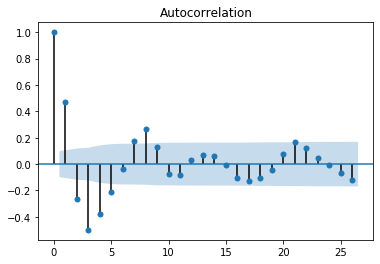

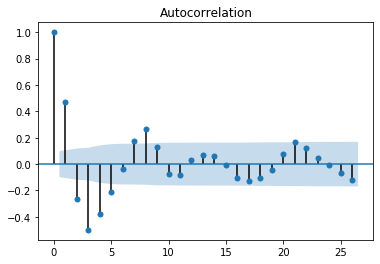

In [26]:
plot_acf(df["waveht"])

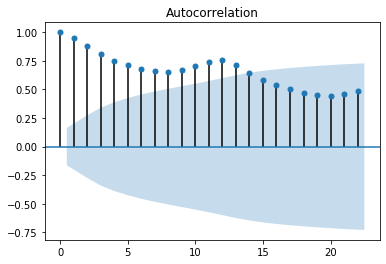

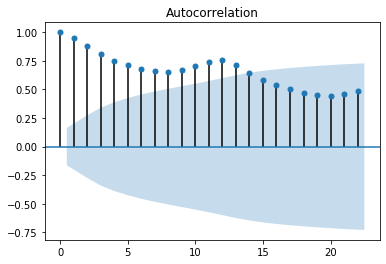

In [30]:
AirP = pd.read_csv("AirPassengers.csv")
AirP.head()
AirP["TravelDate"] = pd.to_datetime(AirP["TravelDate"])
AirP.set_index("TravelDate", inplace = True)
AirP.head()
plot_acf(AirP["Passengers"])

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
remainder = seasonal_decompose(AirP["Passengers"], model="multiplicative").resid[6:138]

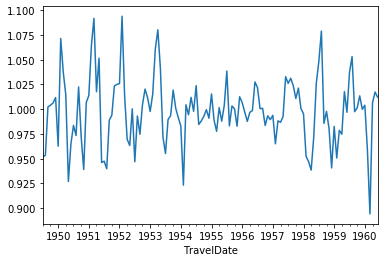

In [32]:
remainder.plot()

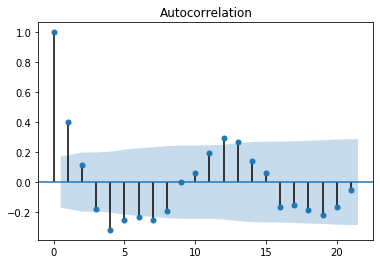

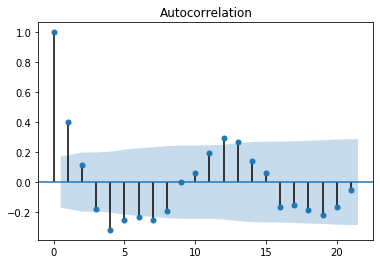

In [38]:
plot_acf(remainder, lags = 21)

109.41868429698121
41.114906183525704
41.114906183525704
19.34053478221228


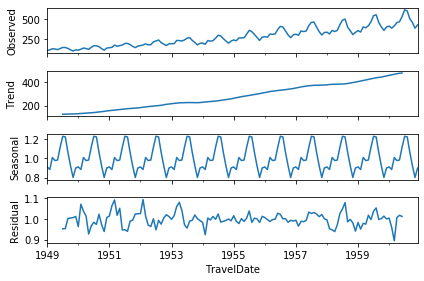

In [53]:
print(AirP["Passengers"][6:138].std())
trend = seasonal_decompose(AirP["Passengers"], model="multiplicative").trend[6:138]
print((AirP["Passengers"][6:138]-trend).std())
decomp = seasonal_decompose(AirP["Passengers"])
seasonal_decompose(AirP["Passengers"], model="multiplicative").plot()
print((decomp.observed - decomp.trend)[6:138].std())
print(seasonal_decompose(AirP["Passengers"]).resid[6:138].std())

In [ ]:
], model="multiplicative")